In [2]:
import os
!pip install missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [4]:
# checking jupyter directory
print('\nContents of the Current Directory:')
for item in os.listdir():
    print(item)


Contents of the Current Directory:
$RECYCLE.BIN
.ipynb_checkpoints
1-4 Dat 430.ipynb
Custom Office Templates
dat-430 (1).ipynb
desktop.ini
Files_to_merge_csv
HR Attrition Dataset Clean Nash.csv
MaybeClean.csv
merged_output.csv
merged_output2.csv
oooImStillDirty.csv
oooImStillDirtysomehow.csv
Project One.ipynb
Untitled.ipynb


In [5]:
# Setting file where all csvs are
folder_path = 'Files_to_merge_csv'
folder_path

'Files_to_merge_csv'

In [6]:
# Merging all of the files

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Read and append each CSV file to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_output.csv', index=False)



In [7]:
# setting new df variable for cleaning
mdf = pd.read_csv('merged_output.csv')

In [8]:
# allowing myself to see all column names
pd.set_option('display.max_columns', None)

In [9]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       7040 non-null   int64  
 1   BusinessTravel            7040 non-null   object 
 2   DailyRate                 7040 non-null   int64  
 3   Department                7040 non-null   object 
 4   DistanceFromHome          7040 non-null   int64  
 5   JobLevel                  7040 non-null   int64  
 6   HourlyRate                7040 non-null   int64  
 7   MonthlyRate               7040 non-null   object 
 8   MonthlyIncome             7040 non-null   object 
 9   JobRole                   7040 non-null   object 
 10  Education                 7040 non-null   object 
 11  EducationField            7040 non-null   object 
 12  EmployeeCount             7040 non-null   int64  
 13  EmployeeNumber            7040 non-null   object 
 14  Environm

In [10]:
# removing duplicates like i should have forever ago
mdf = mdf.drop_duplicates()

In [11]:
# checking for null objects
mdf.info()
# only training, attrition, and training times last year has missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 7039
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5570 non-null   int64  
 1   BusinessTravel            5570 non-null   object 
 2   DailyRate                 5570 non-null   int64  
 3   Department                5570 non-null   object 
 4   DistanceFromHome          5570 non-null   int64  
 5   JobLevel                  5570 non-null   int64  
 6   HourlyRate                5570 non-null   int64  
 7   MonthlyRate               5570 non-null   object 
 8   MonthlyIncome             5570 non-null   object 
 9   JobRole                   5570 non-null   object 
 10  Education                 5570 non-null   object 
 11  EducationField            5570 non-null   object 
 12  EmployeeCount             5570 non-null   int64  
 13  EmployeeNumber            5570 non-null   object 
 14  Environm

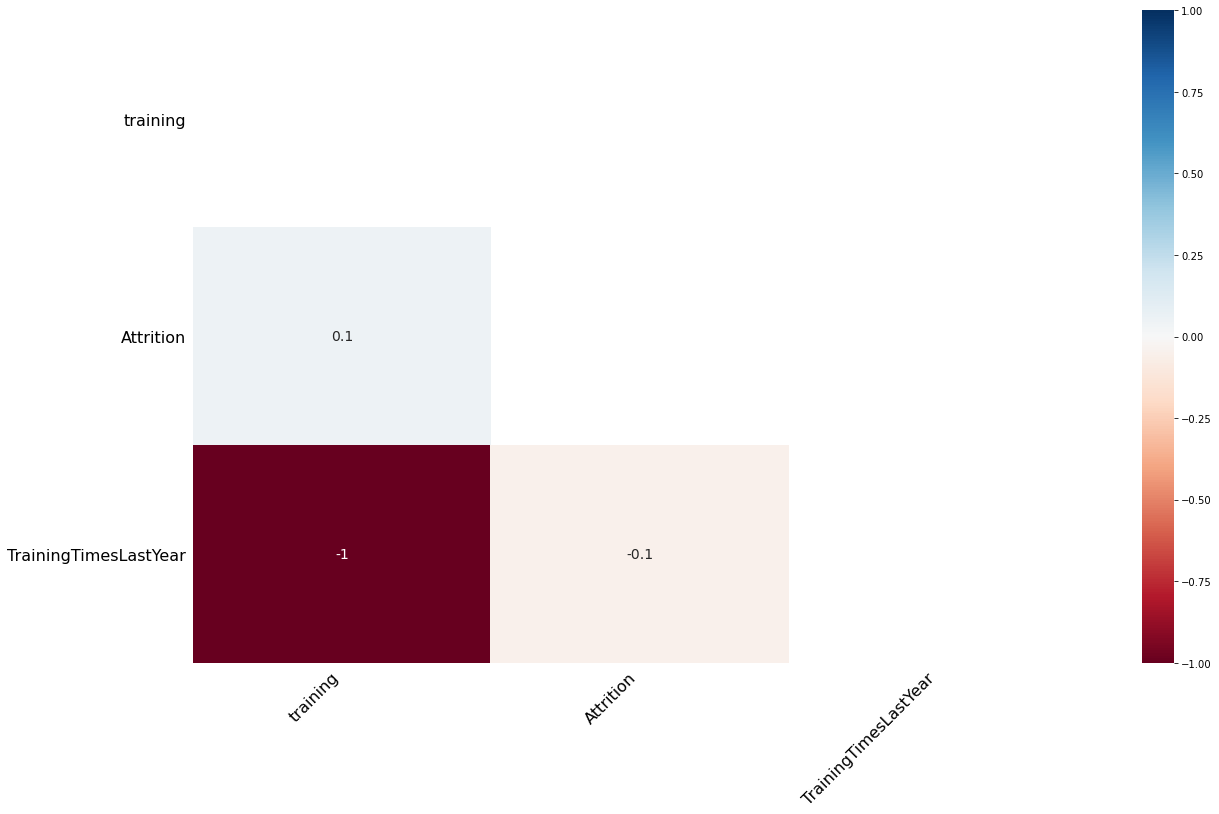

In [12]:
# using misingno
msno.heatmap(mdf)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


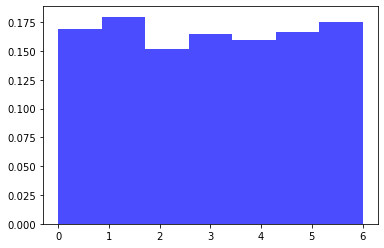

In [13]:
# addressing training missing values
# checking distribution to determine imputation method
plt.hist(mdf['training'], bins=7, density=True, alpha=0.7,color='blue')
plt.show()

In [14]:
# checking distribution numerically
mdf['training'].value_counts(normalize=True)

1.0    0.154
6.0    0.150
0.0    0.145
5.0    0.143
3.0    0.141
4.0    0.137
2.0    0.130
Name: training, dtype: float64

In [15]:
# performing random imputation to perserve distribution
categories = mdf['training'].dropna().unique()

mdf['training'] = mdf['training'].apply(
    lambda x: np.random.choice(categories) if pd.isna(x) else x
)

In [16]:
# checking for null values
print(mdf['training'].isna().sum())

0


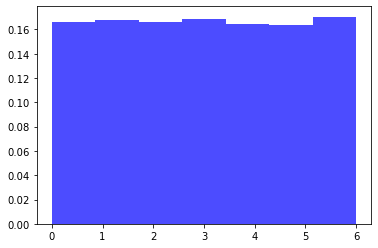

In [17]:
# re-checking distribution
plt.hist(mdf['training'], bins=7, density=True, alpha=0.7,color='blue')
plt.show()

In [18]:
# dropping over18 and employeecount and standard hours
mdf.drop(['EmployeeCount','Over18', 'StandardHours'], axis=1, inplace=True)

In [19]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 7039
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5570 non-null   int64  
 1   BusinessTravel            5570 non-null   object 
 2   DailyRate                 5570 non-null   int64  
 3   Department                5570 non-null   object 
 4   DistanceFromHome          5570 non-null   int64  
 5   JobLevel                  5570 non-null   int64  
 6   HourlyRate                5570 non-null   int64  
 7   MonthlyRate               5570 non-null   object 
 8   MonthlyIncome             5570 non-null   object 
 9   JobRole                   5570 non-null   object 
 10  Education                 5570 non-null   object 
 11  EducationField            5570 non-null   object 
 12  EmployeeNumber            5570 non-null   object 
 13  EnvironmentSatisfaction   5570 non-null   int64  
 14  Gender  

In [20]:
# addressing attrition mia data
empty_rows_attr = mdf[mdf[['Attrition']].isna().any(axis=1)]
print (empty_rows_attr)


      Age     BusinessTravel  DailyRate              Department  \
2028   60  Travel_Frequently       1224                   Sales   
3507   25         Non-Travel       1383  Research & Development   
3552   37      Travel_Rarely        353                   Sales   
3553   18  Travel_Frequently        995                   Sales   
3565   33  Travel_Frequently        377         Human Resources   
...   ...                ...        ...                     ...   
4454   52         Non-Travel       1026         Human Resources   
4463   27  Travel_Frequently        649                   Sales   
4465   52      Travel_Rarely        835         Human Resources   
4469   19      Travel_Rarely        927  Research & Development   
4477   35      Travel_Rarely       1299         Human Resources   

      DistanceFromHome  JobLevel  HourlyRate MonthlyRate MonthlyIncome  \
2028                46         1         135       21600         17280   
3507                24         1         127   

In [21]:
# dropping null values in attr
mdf = mdf.dropna(subset=['Attrition'])


In [22]:
# checking for null values
print(mdf['Attrition'].isna().sum())

0


In [23]:
# addressing TrainingTimesLastYear mia data
empty_rows_TTLY = mdf[mdf[['TrainingTimesLastYear']].isna().any(axis=1)]
print (empty_rows_TTLY)

     Age     BusinessTravel  DailyRate              Department  \
0     33      Travel_Rarely        576  Research & Development   
1     56  Travel_Frequently        695         Human Resources   
2     37         Non-Travel       1424                   Sales   
3     20  Travel_Frequently        187                   Sales   
4     33      Travel_Rarely        796  Research & Development   
..   ...                ...        ...                     ...   
995   34  Travel_Frequently       1221  Research & Development   
996   39      Travel_Rarely        471         Human Resources   
997   18         Non-Travel       1236         Human Resources   
998   26  Travel_Frequently        535  Research & Development   
999   47      Travel_Rarely        399                   Sales   

     DistanceFromHome  JobLevel  HourlyRate MonthlyRate MonthlyIncome  \
0                  27         1         133       21280         17024   
1                   9         5         147       23520      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


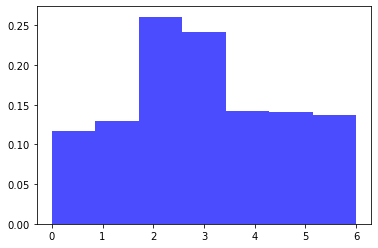

In [24]:
# checking TTLY distribut
plt.hist(mdf['TrainingTimesLastYear'], bins=7, density=True, alpha=0.7,color='blue')
plt.show()

In [25]:
#testing whether missing values themselves are significant in predicting attrition

# 1. Create a binary indicator for missing values
mdf['training_missing'] = mdf['TrainingTimesLastYear'].isnull().astype(int)

# 2. Define your target and features
X = mdf[['training_missing']]  # Only the missingness indicator
y = mdf['Attrition']           # Replace with your actual target column name

# 3. Split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Evaluate the results
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

#  view the coefficient
print("Coefficient for missingness indicator:", model.coef_)


              precision    recall  f1-score   support

          No       0.64      0.85      0.73       990
         Yes       0.55      0.27      0.36       662

    accuracy                           0.62      1652
   macro avg       0.59      0.56      0.55      1652
weighted avg       0.60      0.62      0.58      1652

Coefficient for missingness indicator: [[0.97253987]]


In [26]:
# adding TTLY missing indicator
mdf['TTLY_missing'] = mdf['TrainingTimesLastYear'].isnull().astype(int)


In [27]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5506 entries, 0 to 7039
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5506 non-null   int64  
 1   BusinessTravel            5506 non-null   object 
 2   DailyRate                 5506 non-null   int64  
 3   Department                5506 non-null   object 
 4   DistanceFromHome          5506 non-null   int64  
 5   JobLevel                  5506 non-null   int64  
 6   HourlyRate                5506 non-null   int64  
 7   MonthlyRate               5506 non-null   object 
 8   MonthlyIncome             5506 non-null   object 
 9   JobRole                   5506 non-null   object 
 10  Education                 5506 non-null   object 
 11  EducationField            5506 non-null   object 
 12  EmployeeNumber            5506 non-null   object 
 13  EnvironmentSatisfaction   5506 non-null   int64  
 14  Gender  

In [28]:
# Save handled missing data to csv to finish cleaning in Excel
mdf.to_csv('oooImStillDirty.csv', index=False)


In [29]:
# Still cleaning, formulas addressed. Addressing dups
stillDirtyMdf = pd.read_csv('oooImStillDirtysomehow.csv')

stillDirtyMdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5456 non-null   int64  
 1   BusinessTravel            5456 non-null   object 
 2   DailyRate                 5456 non-null   int64  
 3   Department                5456 non-null   object 
 4   DistanceFromHome          5456 non-null   int64  
 5   JobLevel                  5456 non-null   int64  
 6   HourlyRate                5456 non-null   int64  
 7   MonthlyRate               5456 non-null   int64  
 8   MonthlyIncome             5456 non-null   int64  
 9   JobRole                   5456 non-null   object 
 10  Education                 5456 non-null   int64  
 11  EducationField            5456 non-null   object 
 12  EmployeeNumber            5456 non-null   object 
 13  EnvironmentSatisfaction   5456 non-null   int64  
 14  Gender  

In [30]:
duplicates = stillDirtyMdf[stillDirtyMdf.duplicated(subset=["EmployeeNumber"], keep=False)]
print(duplicates)

#yayyy there are no duplicate employee numbers yay....

Empty DataFrame
Columns: [Age, BusinessTravel, DailyRate, Department, DistanceFromHome, JobLevel, HourlyRate, MonthlyRate, MonthlyIncome, JobRole, Education, EducationField, EmployeeNumber, EnvironmentSatisfaction, Gender, JobInvolvement, training, JobSatisfaction, PerformanceRating, MaritalStatus, NumCompaniesWorked, OverTime, PercentSalaryHike, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, TrainingTimesLastYear, training_missing]
Index: []


In [31]:
stillDirtyMdf.to_csv('MaybeClean.csv', index=False)

In [32]:
# Feature engineering
# Create a new column for income per job level to look for disparities
stillDirtyMdf['IncomeperJobLevel'] = stillDirtyMdf['MonthlyIncome'] / stillDirtyMdf['JobLevel']

# classify employees by tenure
# Define conditions for tenure buckets
conditions = [
    stillDirtyMdf['YearsAtCompany'] < 2,
    (stillDirtyMdf['YearsAtCompany'] >= 2) & (stillDirtyMdf['YearsAtCompany'] <= 5),
    stillDirtyMdf['YearsAtCompany'] > 5
]

# Corresponding bucket labels
choices = ['Short-term', 'Mid-term', 'Long-term']

# Create the new column
stillDirtyMdf['Tenure'] = np.select(conditions, choices, default='Unknown')



stillDirtyMdf.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,JobLevel,HourlyRate,MonthlyRate,MonthlyIncome,JobRole,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,training,JobSatisfaction,PerformanceRating,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,TrainingTimesLastYear,training_missing,IncomeperJobLevel,Tenure
0,33,Travel_Rarely,576,Research & Development,27,1,133,21280,17024,Laboratory Technician,16,Sales,03-1933576,2,F,3,6,5,5,Divorced,0,No,18,2,1,32,4,19,7,12,0,Yes,NaN,1,17024.0,Long-term
1,56,Travel_Frequently,695,Human Resources,9,5,147,23520,18816,Human Resources,14,Other,55-0827682,4,M,4,1,1,1,Single,7,No,21,4,3,25,3,7,10,4,12,Yes,NaN,1,3763.2,Long-term
2,37,Non-Travel,1424,Sales,24,2,89,14240,11392,Manager,14,Life Sciences,75-3156735,2,F,2,6,5,5,Single,5,No,21,4,1,11,4,20,13,8,14,No,NaN,1,5696.0,Long-term
3,20,Travel_Frequently,187,Sales,31,2,91,14560,11648,Human Resources,14,Sales,55-2677679,4,M,2,1,1,1,Married,1,No,25,2,0,22,3,40,17,3,3,No,NaN,1,5824.0,Long-term
4,33,Travel_Rarely,796,Research & Development,5,4,103,16480,13184,Research Director,16,Sales,89-7525549,3,M,3,1,1,1,Divorced,4,No,21,3,2,36,4,6,12,1,11,Yes,NaN,1,3296.0,Long-term


In [33]:
# Sanity check running correlations on non-scaled numeric data
stillDirtyMdf['Attrition'] = stillDirtyMdf['Attrition'].map({'Yes':1, 'No':0})

# Filter out non-numeric columns if needed
numeric_features = stillDirtyMdf.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_features.corr()

# show matrix 
corr_target = corr_matrix['Attrition'].sort_values(ascending=False)
print(corr_target)

Attrition                   1.000000
Education                   0.258614
training_missing            0.178461
DistanceFromHome            0.156309
YearsSinceLastPromotion     0.119128
YearsInCurrentRole          0.118387
YearsAtCompany              0.117638
MonthlyIncome               0.094772
HourlyRate                  0.091451
IncomeperJobLevel           0.089031
NumCompaniesWorked          0.082303
TotalWorkingYears           0.079277
PercentSalaryHike           0.078769
YearsWithCurrManager        0.053760
StockOptionLevel            0.052991
JobLevel                    0.038874
TrainingTimesLastYear       0.019748
MonthlyRate                 0.008714
DailyRate                  -0.006511
Age                        -0.006783
EnvironmentSatisfaction    -0.039252
JobInvolvement             -0.041009
training                   -0.059682
WorkLifeBalance            -0.060987
JobSatisfaction            -0.063626
RelationshipSatisfaction   -0.122503
PerformanceRating          -0.372869
N

In [34]:
# for viz purposes i'd stop here, encoding gets pretty uninterpretable
stillDirtyMdf.to_csv('HR Attrition Dataset Clean Nash.csv', index=False)

In [35]:
# SCALING AND STANDARDIZATION handling categorical data


print(stillDirtyMdf.nunique())

Age                           43
BusinessTravel                 3
DailyRate                   1367
Department                     3
DistanceFromHome              50
JobLevel                       5
HourlyRate                   121
MonthlyRate                 1545
MonthlyIncome               1461
JobRole                        9
Education                     10
EducationField                 7
EmployeeNumber              5456
EnvironmentSatisfaction        4
Gender                         2
JobInvolvement                 4
training                       7
JobSatisfaction                5
PerformanceRating              5
MaritalStatus                  3
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             16
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             41
WorkLifeBalance                4
YearsAtCompany                41
YearsInCurrentRole            21
YearsSinceLastPromotion       16
YearsWithC

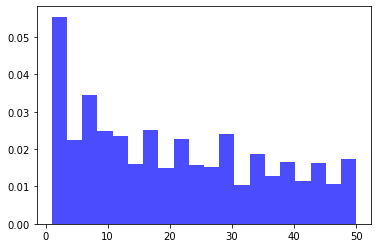

In [36]:
# checking various distributions
plt.hist(stillDirtyMdf['DistanceFromHome'], bins=20, density=True, alpha=0.7,color='blue')
plt.show()


In [37]:
# one-hot encoding some of the categorical columns

# One-hot encode BusinessTravel
df_encod = pd.get_dummies(stillDirtyMdf, columns=['BusinessTravel', 'Gender', 'OverTime', 'MaritalStatus', 'Department','Tenure'])

df_encod.head()

,Age,DailyRate,DistanceFromHome,JobLevel,HourlyRate,MonthlyRate,MonthlyIncome,JobRole,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,training,JobSatisfaction,PerformanceRating,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,TrainingTimesLastYear,training_missing,IncomeperJobLevel,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_F,Gender_M,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,Tenure_Long-term,Tenure_Mid-term,Tenure_Short-term
0,33,576,27,1,133,21280,17024,Laboratory Technician,16,Sales,03-1933576,2,3,6,5,5,0,18,2,1,32,4,19,7,12,0,1,NaN,1,17024.0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0
1,56,695,9,5,147,23520,18816,Human Resources,14,Other,55-0827682,4,4,1,1,1,7,21,4,3,25,3,7,10,4,12,1,NaN,1,3763.2,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0
2,37,1424,24,2,89,14240,11392,Manager,14,Life Sciences,75-3156735,2,2,6,5,5,5,21,4,1,11,4,20,13,8,14,0,NaN,1,5696.0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0
3,20,187,31,2,91,14560,11648,Human Resources,14,Sales,55-2677679,4,2,1,1,1,1,25,2,0,22,3,40,17,3,3,0,NaN,1,5824.0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0
4,33,796,5,4,103,16480,13184,Research Director,16,Sales,89-7525549,3,3,1,1,1,4,21,3,2,36,4,6,12,1,11,1,NaN,1,3296.0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0


In [38]:
# target encoding Job Role, EducationField

# Compute mean target per category
target_JRmean = df_encod.groupby('JobRole')['Attrition'].mean()
target_EFmean = df_encod.groupby('EducationField')['Attrition'].mean()

# Map the means back to the original column
df_encod['JobRole'] = df_encod['JobRole'].map(target_JRmean)
df_encod['EducationField'] = df_encod['EducationField'].map(target_EFmean)

In [39]:
# feature scaling numeric

# 1. Log transform MonthlyIncome
df_encod['MonthlyIncome_log'] = np.log1p(df_encod['MonthlyIncome'])

# 2. StandardScaler
standard_features = ['DailyRate', 'HourlyRate', 'YearsAtCompany', 'IncomeperJobLevel']
scaler_standard = StandardScaler()
df_encod[standard_features] = scaler_standard.fit_transform(df_encod[standard_features])

# 3. MinMaxScaler
minmax_features = ['MonthlyRate', 'DistanceFromHome']
scaler_minmax = MinMaxScaler()
df_encod[minmax_features] = scaler_minmax.fit_transform(df_encod[minmax_features])

# 4. StandardScaler on log-transformed income
df_encod['MonthlyIncome_log_scaled'] = scaler_standard.fit_transform(df_encod[['MonthlyIncome_log']])

                                          


In [40]:
df_encod.head()


,Age,DailyRate,DistanceFromHome,JobLevel,HourlyRate,MonthlyRate,MonthlyIncome,JobRole,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,training,JobSatisfaction,PerformanceRating,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,TrainingTimesLastYear,training_missing,IncomeperJobLevel,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_F,Gender_M,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,Tenure_Long-term,Tenure_Mid-term,Tenure_Short-term,MonthlyIncome_log,MonthlyIncome_log_scaled
0,33,-0.533549,0.530612,1,1.480197,0.770367,17024,0.404000,16,0.465465,03-1933576,2,3,6,5,5,0,18,2,1,32,4,0.200178,7,12,0,1,NaN,1,3.342761,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,9.742438,1.117308
1,56,-0.240588,0.163265,5,1.898815,0.860309,18816,0.453052,14,0.425901,55-0827682,4,4,1,1,1,7,21,4,3,25,3,-0.792177,10,4,12,1,NaN,1,-0.242984,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,9.842516,1.284061
2,37,1.554105,0.469388,2,0.164539,0.487693,11392,0.359918,14,0.316253,75-3156735,2,2,6,5,5,5,21,4,1,11,4,0.282874,13,8,14,0,NaN,1,0.279649,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,9.340754,0.448009
3,20,-1.491212,0.612245,2,0.224342,0.500542,11648,0.453052,14,0.465465,55-2677679,4,2,1,1,1,1,25,2,0,22,3,1.936799,17,3,3,0,NaN,1,0.314260,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,9.362976,0.485035
4,33,0.008059,0.081633,4,0.583158,0.577635,13184,0.398637,16,0.465465,89-7525549,3,3,1,1,1,4,21,3,2,36,4,-0.874874,12,1,11,1,NaN,1,-0.369316,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,9.486835,0.691413


In [41]:
# dropping unique identifier EmployeeNumber
df_encod.drop(['EmployeeNumber'], axis=1, inplace=True)

In [42]:
df_encod.head()

,Age,DailyRate,DistanceFromHome,JobLevel,HourlyRate,MonthlyRate,MonthlyIncome,JobRole,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,training,JobSatisfaction,PerformanceRating,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,TrainingTimesLastYear,training_missing,IncomeperJobLevel,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_F,Gender_M,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,Tenure_Long-term,Tenure_Mid-term,Tenure_Short-term,MonthlyIncome_log,MonthlyIncome_log_scaled
0,33,-0.533549,0.530612,1,1.480197,0.770367,17024,0.404000,16,0.465465,2,3,6,5,5,0,18,2,1,32,4,0.200178,7,12,0,1,NaN,1,3.342761,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,9.742438,1.117308
1,56,-0.240588,0.163265,5,1.898815,0.860309,18816,0.453052,14,0.425901,4,4,1,1,1,7,21,4,3,25,3,-0.792177,10,4,12,1,NaN,1,-0.242984,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,9.842516,1.284061
2,37,1.554105,0.469388,2,0.164539,0.487693,11392,0.359918,14,0.316253,2,2,6,5,5,5,21,4,1,11,4,0.282874,13,8,14,0,NaN,1,0.279649,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,9.340754,0.448009
3,20,-1.491212,0.612245,2,0.224342,0.500542,11648,0.453052,14,0.465465,4,2,1,1,1,1,25,2,0,22,3,1.936799,17,3,3,0,NaN,1,0.314260,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,9.362976,0.485035
4,33,0.008059,0.081633,4,0.583158,0.577635,13184,0.398637,16,0.465465,3,3,1,1,1,4,21,3,2,36,4,-0.874874,12,1,11,1,NaN,1,-0.369316,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,9.486835,0.691413


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out non-numeric columns if needed
numeric_features = df_encod.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_features.corr()

# show matrix 
corr_target = corr_matrix['Attrition'].sort_values(ascending=False)
print(corr_target)



Attrition                   1.000000
Education                   0.258614
training_missing            0.178461
DistanceFromHome            0.156309
EducationField              0.145758
YearsSinceLastPromotion     0.119128
YearsInCurrentRole          0.118387
YearsAtCompany              0.117638
MonthlyIncome_log           0.104249
MonthlyIncome_log_scaled    0.104249
MonthlyIncome               0.094772
HourlyRate                  0.091451
IncomeperJobLevel           0.089031
JobRole                     0.086218
NumCompaniesWorked          0.082303
TotalWorkingYears           0.079277
PercentSalaryHike           0.078769
YearsWithCurrManager        0.053760
StockOptionLevel            0.052991
JobLevel                    0.038874
TrainingTimesLastYear       0.019748
MonthlyRate                 0.008714
DailyRate                  -0.006511
Age                        -0.006783
EnvironmentSatisfaction    -0.039252
JobInvolvement             -0.041009
training                   -0.059682
W

In [45]:
df_encod.to_csv('HR Attrition Cleaned Dataset Reporting Database Nash.csv', index=False)